Data cleaned and saved. Shape: (160, 5)
      Entity Code  Year  \
0    Albania  ALB  2020   
1    Algeria  DZA  2020   
2  Argentina  ARG  2020   
3    Armenia  ARM  2020   
4      Aruba  ABW  2020   

   Share of population with no formal education, 1820-2020  \
0                                                1.0         
1                                               13.0         
2                                                2.0         
3                                                0.0         
4                                                5.0         

   Share of population with some formal education, 1820-2020  
0                                               99.0          
1                                               87.0          
2                                               98.0          
3                                              100.0          
4                                               95.0          


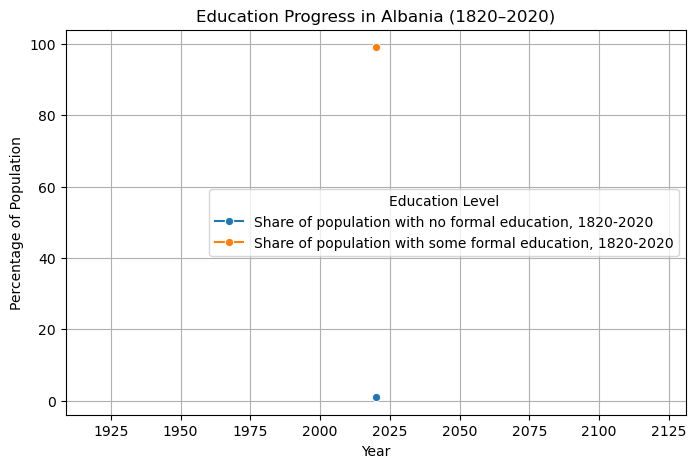

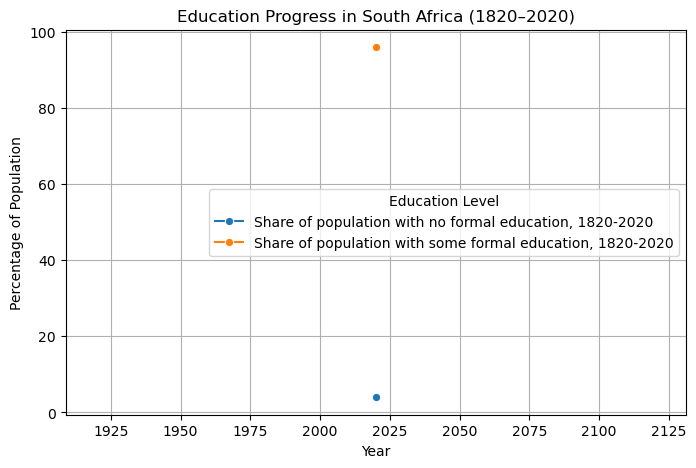

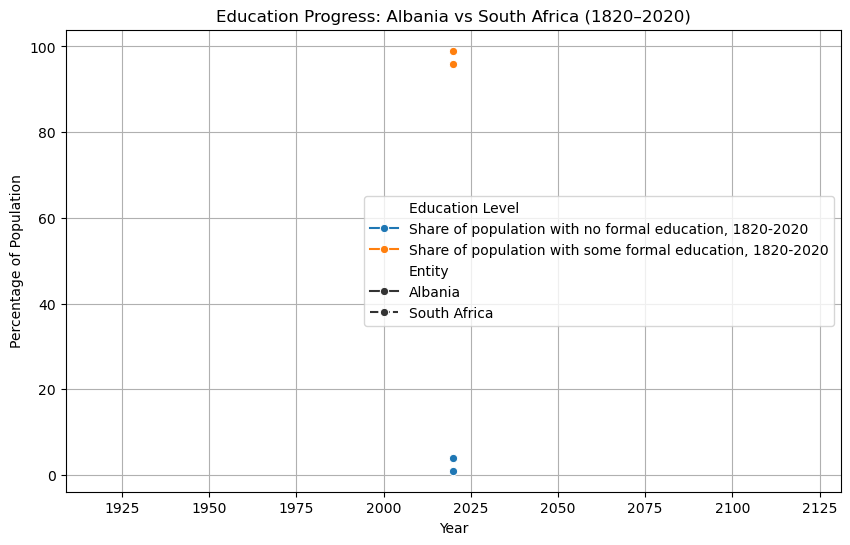

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load & Clean Dataset
df = pd.read_csv("edu_data.csv", sep=";")

# Drop empty columns
df = df.dropna(how="all", axis=1)

# Drop repeated headers
df = df[df["Entity"] != "Entity"]

# Reset index
df = df.reset_index(drop=True)

# Convert datatypes
df["Year"] = df["Year"].astype(int)
df["Share of population with no formal education, 1820-2020"] = pd.to_numeric(
    df["Share of population with no formal education, 1820-2020"], errors="coerce"
)
df["Share of population with some formal education, 1820-2020"] = pd.to_numeric(
    df["Share of population with some formal education, 1820-2020"], errors="coerce"
)

# Drop rows with missing values
df = df.dropna().reset_index(drop=True)

# NEW: Remove duplicate years per country
df = df.drop_duplicates(subset=["Entity", "Year"], keep="first").reset_index(drop=True)

# Save cleaned dataset
df.to_csv("edu_data_clean.csv", index=False)
df.to_excel("edu_data_clean.xlsx", index=False)

print("Data cleaned and saved. Shape:", df.shape)
print(df.head())

#Visualization - Albania
albania = df[df["Entity"] == "Albania"]

albania_long = albania.melt(
    id_vars=["Year"],
    value_vars=[
        "Share of population with no formal education, 1820-2020",
        "Share of population with some formal education, 1820-2020"
    ],
    var_name="Education Level",
    value_name="Percentage"
)

plt.figure(figsize=(8,5))
sns.lineplot(data=albania_long, x="Year", y="Percentage", hue="Education Level", marker="o")
plt.title("Education Progress in Albania (1820–2020)")
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.grid(True)
plt.show()

#Visualization - South Africa
south_africa = df[df["Entity"] == "South Africa"]

sa_long = south_africa.melt(
    id_vars=["Year"],
    value_vars=[
        "Share of population with no formal education, 1820-2020",
        "Share of population with some formal education, 1820-2020"
    ],
    var_name="Education Level",
    value_name="Percentage"
)

plt.figure(figsize=(8,5))
sns.lineplot(data=sa_long, x="Year", y="Percentage", hue="Education Level", marker="o")
plt.title("Education Progress in South Africa (1820–2020)")
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.grid(True)
plt.show()

#Multi-Country Comparison (Albania vs South Africa)
countries = ["Albania", "South Africa"]
subset = df[df["Entity"].isin(countries)]

# Reshape into tidy format
subset_long = subset.melt(
    id_vars=["Entity", "Year"],
    value_vars=[
        "Share of population with no formal education, 1820-2020",
        "Share of population with some formal education, 1820-2020"
    ],
    var_name="Education Level",
    value_name="Percentage"
)

plt.figure(figsize=(10,6))
sns.lineplot(data=subset_long, x="Year", y="Percentage", hue="Education Level", style="Entity", marker="o")

plt.title("Education Progress: Albania vs South Africa (1820–2020)")
plt.xlabel("Year")
plt.ylabel("Percentage of Population")
plt.grid(True)
plt.show()